# 1 Initialisation

## 1.1 Imports

In [1]:
# Librairies pour le traitement des données
import pandas as pd
# Dask API is a parallelized version of Numpy, Pandas, Sklearn.
import dask.dataframe as dd #  Pour la première fois installer avec la commande 'pip install "dask[complete]"'
import numpy as np

# Librairies pour la visualisation de graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Définir le style par défaut pour les graphiques

from common_functions import *
from uni_bi_variate_functions import *
from multi_variate_functions import *

low_memory=False # faible mémoire vive (RAM)

## 1.3 Récupération du Data Set

In [2]:
# Ouverture du fichier CSV en téléchargement : 
df = dd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', assume_missing=True, low_memory=low_memory, 
dtype={'allergens': 'object',
       'allergens_fr': 'object',
       'categories': 'object',
       'categories_fr': 'object',
       'categories_tags': 'object',
       'cities': 'object',
       'cities_tags': 'object',
       'code': 'object',
       'created_t': 'object',
       'emb_codes': 'object',       
       'emb_codes_tags': 'object',
       'first_packaging_code_geo': 'object',
       'generic_name': 'object',
       'image_small_url': 'object',
       'image_url': 'object',
       'ingredients_from_palm_oil_tags': 'object',
       'ingredients_that_may_be_from_palm_oil_tags': 'object',
       'labels': 'object',
       'labels_fr': 'object',
       'labels_tags': 'object',
       'last_modified_t': 'object',
       'main_category': 'object',
       'main_category_fr': 'object',
       'manufacturing_places': 'object',
       'manufacturing_places_tags': 'object',
       'origins': 'object',
       'origins_tags': 'object',
       'packaging': 'object',
       'packaging_tags': 'object',
       'pnns_groups_1': 'object',
       'pnns_groups_2': 'object',
       'purchase_places': 'object',
       'stores': 'object',
       'traces': 'object',
       'traces_fr': 'object',
       'traces_tags': 'object',          
       'created_datetime': 'object',
       'last_modified_datetime': 'object',
       }) #le fichier doit être placé dans le même répertoire que ce notebook

if not low_memory:
       df = df.persist() #Si assez de RAM dispo, cele permettera d'accéler les futurs traitements

## Structure du data set

In [3]:
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
npartitions=13,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object,object,object,float64,float64,object,float64,float64,object,float64,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,flo

In [4]:
df.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [6]:
df.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [7]:
df.shape

(Delayed('int-d3a04ef2-9128-4152-8b49-1b538332fe22'), 162)

In [8]:
df.shape[0].compute()

320772

In [9]:
df.describe().compute()  

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,4.440000e+02,118.000000,1.600000,...,6.487500,0.000000,15.000000,35.250000,NaN,148.900000,2.000000,2.000000,NaN,NaN
50%,NaN,2.000000,0.000000,NaN,0.000000,NaN,NaN,1.205000e+03,502.000000,7.600000,...,7.200000,32.000000,15.000000,53.500000,NaN,199.700000,11.000000,11.000000,NaN,NaN
75%,NaN,4.000000,0.000000,NaN,0.000000,NaN,NaN,1.795000e+03,1200.000000,22.000000,...,7.600000,56.150000,15.000000,70.000000,NaN,828.000000,17.000000,17.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


Le data set contient :
	- 320772 lignes et 162 colonnes.
	- 39608589 valeurs manquantes, ce qui représente 76.22 % du data set.


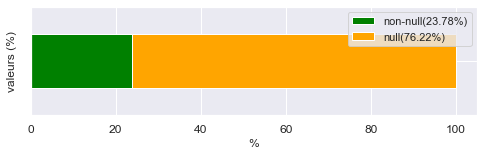

In [10]:
verifier_taille(df)

In [11]:
afficher_echantillon(df,0.000019).iloc[:,30:50].compute()

Voici un sous-échantillon aléatoire :


,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n
10908,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1224,NaN,Suisse,en:switzerland,Suisse,"eau, farine fleur, œuf entier (base d'œuf enti...",NaN,NaN,NaN,NaN,NaN,180 g,NaN,0.0,[ eau -> fr:eau ] [ farine-fleur -> fr:fari...,NaN,NaN,1.0,NaN,huile-de-palme,0.0


In [12]:
# valeurs_manquantes(df).compute()

In [13]:
len(df[df['code'].isnull()].compute())

23

In [14]:
df = df[df['code'].notnull()]

In [15]:
df.compute()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27647,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
27648,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27649,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['code'].unique().compute()

0         0000000003087
1         0000000004530
2         0000000004559
3         0000000016087
4         0000000016094
              ...      
320744    9948282780603
320745         99567453
320746    9970229501521
320747    9980282863788
320748     999990026839
Name: code, Length: 320749, dtype: object

## Transformation des colonnes dates

In [17]:
dates_t = ['created_t', 'last_modified_t']
for date in dates_t:
    df[date.split('_')[0]] = dd.to_datetime(df[date], unit='s')

In [18]:
df = df.drop(columns=['created_datetime', 'last_modified_datetime'])

In [19]:
df.dtypes

code                               object
url                                object
creator                            object
created_t                          object
last_modified_t                    object
                                ...      
nutrition-score-uk_100g           float64
glycemic-index_100g               float64
water-hardness_100g               float64
created                    datetime64[ns]
last                       datetime64[ns]
Length: 162, dtype: object

In [20]:
df['code'].unique().compute()

0         0000000003087
1         0000000004530
2         0000000004559
3         0000000016087
4         0000000016094
              ...      
320744    9948282780603
320745         99567453
320746    9970229501521
320747    9980282863788
320748     999990026839
Name: code, Length: 320749, dtype: object

In [21]:
afficher_echantillon(df,0.000019).compute()

Voici un sous-échantillon aléatoire :


,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,...,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,created,last
13551,5410046000189,http://world-fr.openfoodfacts.org/produit/5410...,date-limite-app,1422339461,1488189294,Confiture Fraises & Rhubarbe,NaN,450 g,bocal,bocal,...,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,2015-01-27 06:17:41,2017-02-27 09:54:54
15070,8413700003349,http://world-fr.openfoodfacts.org/produit/8413...,openfoodfacts-contributors,1378049814,1442537175,Perejil seco molido,Perejil seco molido,50 g,Bote de plástico,bote-de-plastico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-01 15:36:54,2015-09-18 00:46:15


# Cleanning

In [23]:
# Supprimer les colonnes vides
n = len(df)
empty = []
for col in df.columns.tolist():
    if df[col].isnull().sum().compute() == n :
        empty.append(col)
print(empty, ' are empty')
df = df.drop(columns=empty)
df.shape

['cities', 'allergens_fr', 'no_nutriments', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', 'butyric-acid_100g', 'caproic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'melissic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'chlorophyl_100g', 'glycemic-index_100g', 'water-hardness_100g']  are empty


(Delayed('int-f8f031fc-c0d4-4450-a214-aa517cea41c0'), 141)

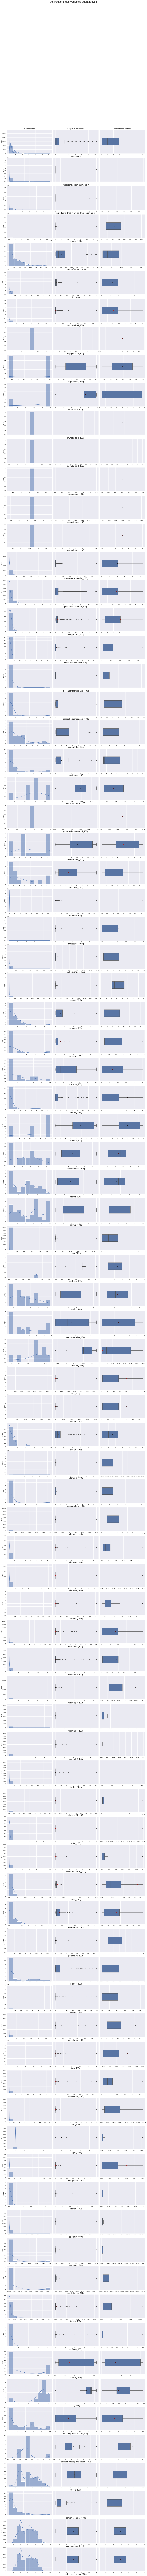

In [25]:
histo_distribution(df[colsOfType(df, 'float64')])

In [ ]:
cols = colsOfType(df, 'float64')
cols = sorted([col for col in cols if '_100g' in col and col not in ['carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g','energy_100g', 'energy-from-fat_100g']])
print(cols)

In [ ]:
df[df['ph_100g']==0].compute()

In [ ]:
df['ph_100g'] = df['ph_100g'].replace(0,7)
df[df['ph_100g']==0].compute()

In [ ]:
# df[df['energy_100g']==df['energy_100g'].max()].compute()

In [ ]:
# df['energy_100g'] = df['energy_100g'].replace(df['energy_100g'].max(),df['energy_100g'].quantile(.75))

In [ ]:
# df[df['energy_100g']>df['energy_100g'].quantile(.75)][['product_name','energy_100g', 'quantity']].compute()

In [ ]:
df_copy = df.copy()
for col in cols:
    df = df_copy[(df_copy[col]>=0) & (df_copy[col]<=100)]
df.compute()

In [ ]:
histo_distribution(df[cols])

In [ ]:
# mask = (df['created_t'].str.contains('\D')).replace(np.nan, False)
# df[mask].compute()

In [ ]:
# mask = (df['code'].str.contains('\D')).replace(np.nan, False)
# df[mask].compute()

In [ ]:
# mask = (df['code'].isna()).replace(np.nan, False)
# df[mask].compute()